In [13]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
url = 'http://quotes.toscrape.com/'

# Function

In [14]:
def input_file(file, soup):
    f = open(file, 'w', encoding='utf-8')
    f.write(soup.prettify())
    f.close()


In [27]:
def input_file_2(authors, links, birthdates, texts):
    # f = open(file, 'a+')
    data = pd.DataFrame(columns=['Tacgia', 'Link', 'Namsinh', 'Quote'])
    
    for i in range(len(links)):
        data.loc[i] = [authors[i],str(links[i]), str(birthdates[i]),  str(texts[i])]
    data.to_csv(r'D:\IntroDS\final_project\Bai3\Quotes.csv')
def tacgiaLink(results, authors,texts,birthdates, links):
    for result in results:
        author = result.find('small', class_='author')
        authors.append(author.text)
        text = result.find('span', class_='text')
        texts.append(text.text)
        link = result.find_all('a',{'href' : re.compile("/author/.+")})
        url_sub = 'http://quotes.toscrape.com/'
        url_sub = url_sub+str(link[0]['href'])
        links.append(url_sub)
        page_sub = requests.get(url_sub)
        soup_sub = BeautifulSoup(page_sub.text, 'html.parser')
        birthdate = soup_sub.find('span', class_='author-born-date')
        if birthdate is None:
            birthdates.append('Unknown')
        else:
            birthdates.append(birthdate.text)
        print(str(author.text) + '\t' + str(url_sub) + '\t' + str(birthdate.text) + '\t' + str(text.text))
    return authors,texts,birthdates, links
    

# Cau 3.1.1

In [28]:
html = requests.get(url)
soup = BeautifulSoup(html.text, 'html.parser')
input_file('kq.txt', soup)


Trang web này được gọi là "Quotes to Scrape".
Trang web có một tiêu đề, một thanh điều hướng trên đầu trang và phần thân của trang được chia thành hai cột. Cột bên trái chứa danh sách trích dẫn và cột bên phải có một hình ảnh và mô tả về trang web. Cuối trang web là chân trang chứa thông tin về tác giả và liên kết đến trang login. Cấu trúc của trang web được viết bằng ngôn ngữ đánh dấu siêu văn bản HTML và được định dạng bằng CSS.

# Cau 3.1.2

* a

In [29]:
results = soup.find_all('div', class_='quote')
# print(result)



* b 

In [30]:
authors = []
for result in results:
    author = result.find('small', class_='author')
    authors.append(author.text)
# for i in range(len(authors)):
    # print('Author:',authors[i])


* c

In [31]:
authors = []
texts = []
birthdates = []
links = []
tacgiaLink(results, authors,texts,birthdates, links)

Albert Einstein	http://quotes.toscrape.com//author/Albert-Einstein	March 14, 1879	“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
J.K. Rowling	http://quotes.toscrape.com//author/J-K-Rowling	July 31, 1965	“It is our choices, Harry, that show what we truly are, far more than our abilities.”
Albert Einstein	http://quotes.toscrape.com//author/Albert-Einstein	March 14, 1879	“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Jane Austen	http://quotes.toscrape.com//author/Jane-Austen	December 16, 1775	“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Marilyn Monroe	http://quotes.toscrape.com//author/Marilyn-Monroe	June 01, 1926	“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Albert Einstein	http://quotes.toscrape.com//author/Albe

(['Albert Einstein',
  'J.K. Rowling',
  'Albert Einstein',
  'Jane Austen',
  'Marilyn Monroe',
  'Albert Einstein',
  'André Gide',
  'Thomas A. Edison',
  'Eleanor Roosevelt',
  'Steve Martin'],
 ['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
  '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
  '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
  '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
  "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
  '“Try not to become a man of success. Rather become a man of value.”',
  '“It is better to be hated for what you are than to be loved for what you are not.”',
  "“I have not failed. I've just found 10,000 ways that won't wor

* d

In [32]:
authors = []
texts = []
birthdates = []
links = []
pape = soup
for i in range(1, 10000):
    url= 'http://quotes.toscrape.com/page/'+str(i)+'/'
    html = requests.get(url)
    soup_sub = BeautifulSoup(html.text, 'html.parser')
    results = soup_sub.find_all('div', class_='quote')
    if len(results) == 0:
        input_file_2(authors, links, birthdates, texts)
        break
    # print(url)
    authors,texts,birthdates, links =  tacgiaLink(results, authors,texts,birthdates, links)
    print(f'########################{i}############################')


Albert Einstein	http://quotes.toscrape.com//author/Albert-Einstein	March 14, 1879	“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
J.K. Rowling	http://quotes.toscrape.com//author/J-K-Rowling	July 31, 1965	“It is our choices, Harry, that show what we truly are, far more than our abilities.”
Albert Einstein	http://quotes.toscrape.com//author/Albert-Einstein	March 14, 1879	“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Jane Austen	http://quotes.toscrape.com//author/Jane-Austen	December 16, 1775	“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Marilyn Monroe	http://quotes.toscrape.com//author/Marilyn-Monroe	June 01, 1926	“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Albert Einstein	http://quotes.toscrape.com//author/Albe

# 3.2. Khai phá dữ liệu (35 điểm)

In [101]:
# include 
import pandas as pd
import numpy as np
import matplotlib_inline as plt
import plotly.express as px
import seaborn as sns
from datetime import datetime


In [69]:
meta = pd.read_csv(r'Quotes.csv', encoding='utf-8', index_col='Unnamed: 0')
meta

,Tacgia,Link,Namsinh,Quote
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",“The world as we have created it is a process ...
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,"July 31, 1965","“It is our choices, Harry, that show what we t..."
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,"March 14, 1879",“There are only two ways to live your life. On...
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,"December 16, 1775","“The person, be it gentleman or lady, who has ..."
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,"June 01, 1926","“Imperfection is beauty, madness is genius and..."
...,...,...,...,...
95,Harper Lee,http://quotes.toscrape.com//author/Harper-Lee,"April 28, 1926",“You never really understand a person until yo...
96,Madeleine L'Engle,http://quotes.toscrape.com//author/Madeleine-L...,"November 29, 1918",“You have to write the book that wants to be w...
97,Mark Twain,http://quotes.toscrape.com//author/Mark-Twain,"November 30, 1835",“Never tell the truth to people who are not wo...
98,Dr. Seuss,http://quotes.toscrape.com//author/Dr-Seuss,"March 02, 1904","“A person's a person, no matter how small.”"


In [70]:
# convert Namsinh to date
meta.Namsinh = meta.Namsinh.apply(lambda x: datetime.strptime(x, "%B %d, %Y").date())
meta.Namsinh = meta.Namsinh.apply(lambda x: pd.to_datetime(x))
meta['Tacgia'] = meta['Tacgia'].astype(str)
meta['Link'] = meta['Link'].astype(str)
meta['Quote'] = meta['Quote'].astype(str)
meta

,Tacgia,Link,Namsinh,Quote
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“The world as we have created it is a process ...
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t..."
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“There are only two ways to live your life. On...
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ..."
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and..."
...,...,...,...,...
95,Harper Lee,http://quotes.toscrape.com//author/Harper-Lee,1926-04-28,“You never really understand a person until yo...
96,Madeleine L'Engle,http://quotes.toscrape.com//author/Madeleine-L...,1918-11-29,“You have to write the book that wants to be w...
97,Mark Twain,http://quotes.toscrape.com//author/Mark-Twain,1835-11-30,“Never tell the truth to people who are not wo...
98,Dr. Seuss,http://quotes.toscrape.com//author/Dr-Seuss,1904-03-02,"“A person's a person, no matter how small.”"


## 3.2.1. Xử lý dữ liệu- Data Imputation (3 điểm):


In [71]:
# Bạn hãy thêm vào Trường STT và điền tự động dữ liệu của trường này?

meta['STT'] = list(range(len(meta)))
meta.head(3)

,Tacgia,Link,Namsinh,Quote,STT
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“The world as we have created it is a process ...,0
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t...",1
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“There are only two ways to live your life. On...,2


**Một số giá trị của dữ liệu Trường ngày sinh chưa có, bạn hãy đề xuất cách điền?**

+ ***Cách thứ 1***: em thấy dữ liệu này là tên các người nổi tiếng vì thế thông tin của nó đa số sẽ được publish ở trên mạng. Trường hợp nếu trên mạng không có thì chúng em sẽ lấy strimmed median của ngày sinh đã có
+ ***Cách thứ 2***: sử dụng chat GPT api hiện tại để lấy thông tin (10,000 tokens/tháng) 

--> Nếu gặp tình huống này nhóm em sẽ chọn cách thứ 1

**Đề xuất cách điền tuổi của các tác giả?**

+ ***Cách thứ 1***: Đối với việc thay thế các dữ liệu thiếu thì có rất nhiều cách để điền điển hình như là mean, 
median nhưng với 2 tham số này thì rất dễ bị bias vì thế chúng ta có thêm các là lấy strimmed mean, strimmed median
thì sẽ giảm bị bias
+ ***Cách thứ 2***: em thấy dữ liệu này là tên các người nổi tiếng vì thế thông tin của nó đa số sẽ được publish ở trên
mạng. Trường hợp nếu trên mạng không có thì chúng em sẽ lấy strimmed median của các độ tuổi đã có
+ ***Cách thứ 3***: sử dụng selenium để lấy tuổi

--> Nếu gặp tình huống này nhóm em sẽ chọn cách thứ 3

In [45]:
ages = {}

In [47]:
for i in meta.Tacgia.unique():
    ages[i] = -1

In [51]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
from random import randint
driver = webdriver.Chrome()

In [52]:
# Get born  author
for i in  range(len(meta)):
    if ages[meta.Tacgia[i]] != -1: continue
    driver.get('https://www.google.com.vn/?hl=vi')
    input_element = driver.find_element(By.XPATH, "//*[@id='APjFqb']")
    input_element.send_keys(f'how old is author {meta.Tacgia[i]}' + Keys.ENTER)
    age = driver.find_element(By.XPATH, '//*[@id="rso"]/div[1]/div/block-component/div/div[1]/div[1]/div/div/div[1]/div/div/div[1]/div/div[1]/div[2]/div/div[1]').text.replace(' tuổi', '')
    born = driver.find_element(By.XPATH, '//*[@id="rso"]/div[1]/div/block-component/div/div[1]/div[1]/div/div/div[1]/div/div/div[1]/div/div[1]/div[2]/div/div[2]/div').text.split('–')[0]
    
    if len(born) <= 4:
        
        if meta.Namsinh[i].year != int(born):
            print(f'{meta.Link[i]}')
            age = None
        ages[meta.Tacgia[i]] = age
    else:
        born = driver.find_element(By.XPATH, '//*[@id="rso"]/div[1]/div/block-component/div/div[1]/div[1]/div/div/div[1]/div/div/div[1]/div/div[1]/div[2]/div/div[2]/div').text.split(',')[1]
        if meta.Namsinh[i].year != int(born):
            print(f'{meta.Link[i]}')
            age = None
        ages[meta.Tacgia[i]] = age
    print(f'{meta.Tacgia[i]} --> Done')
    time.sleep(randint(2, 6))
driver.quit()

J.K. Rowling --> Done
Jane Austen --> Done
Marilyn Monroe --> Done
André Gide --> Done
Thomas A. Edison --> Done
Eleanor Roosevelt --> Done
Steve Martin --> Done
Bob Marley --> Done
Dr. Seuss --> Done
Douglas Adams --> Done
Elie Wiesel --> Done
Friedrich Nietzsche --> Done
Mark Twain --> Done
Allen Saunders --> Done
Pablo Neruda --> Done
Ralph Waldo Emerson --> Done
Mother Teresa --> Done
Garrison Keillor --> Done
Jim Henson --> Done
Charles M. Schulz --> Done
William Nicholson --> Done
Jorge Luis Borges --> Done
George Eliot --> Done
George R.R. Martin --> Done
C.S. Lewis --> Done
Martin Luther King Jr. --> Done
James Baldwin --> Done
Haruki Murakami --> Done
Alexandre Dumas fils --> Done
Stephenie Meyer --> Done
Ernest Hemingway --> Done
Helen Keller --> Done
George Bernard Shaw --> Done
Charles Bukowski --> Done
Suzanne Collins --> Done
J.R.R. Tolkien --> Done
Alfred Tennyson --> Done
Terry Pratchett --> Done
J.D. Salinger --> Done
George Carlin --> Done
John Lennon --> Done
W.C. Fi

In [74]:
meta['Tuoi'] = meta.apply(lambda row: int(ages[row.Tacgia]), axis=1)

In [75]:
print(f'Quantily values of the age NUll: {meta.Tuoi.isna().sum()}')

Quantily values of the age NUll: 0


In [76]:
meta.head(5)

,Tacgia,Link,Namsinh,Quote,STT,Tuoi
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“The world as we have created it is a process ...,0,76
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t...",1,57
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“There are only two ways to live your life. On...,2,76
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ...",3,41
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and...",4,36


# 3.2.2. Khám phá dữ liệu- Data Exploration (12 điểm):

In [77]:
print(f'Data size = {meta.shape}')

Data size = (100, 6)


In [78]:
print("####Check data type####")
meta.info()

####Check data type####
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tacgia   100 non-null    object        
 1   Link     100 non-null    object        
 2   Namsinh  100 non-null    datetime64[ns]
 3   Quote    100 non-null    object        
 4   STT      100 non-null    int64         
 5   Tuoi     100 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 5.5+ KB


In [83]:
print("####Check data describe####")
meta[['Tuoi']].describe()

####Check data describe####


,Tuoi
count,100.00000
mean,66.24000
std,17.01106
min,27.00000
25%,57.00000
50%,73.00000
75%,77.25000
max,94.00000


In [84]:
print("####Check data null####")

meta.isna().sum()

####Check data null####


Tacgia     0
Link       0
Namsinh    0
Quote      0
STT        0
Tuoi       0
dtype: int64

> ### Top 10 người nổi tiếng có số lượng câu nói nhiều nhất và ít nhất

In [85]:
meta.head()

,Tacgia,Link,Namsinh,Quote,STT,Tuoi
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“The world as we have created it is a process ...,0,76
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t...",1,57
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“There are only two ways to live your life. On...,2,76
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ...",3,41
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and...",4,36


In [105]:
most_author = meta.groupby(['Tacgia']).size()
most_author = pd.DataFrame({'Author': most_author.index, 'Quantily': most_author.values}).sort_values(by='Quantily' , ascending=False)

most_author.head(5)

,Author,Quantily
0,Albert Einstein,10
26,J.K. Rowling,9
37,Marilyn Monroe,7
38,Mark Twain,6
11,Dr. Seuss,6


In [106]:
px.bar(
    most_author[:10],
    x= 'Author',
    y= 'Quantily',
    text_auto='.s',
    color='Author',
    title = 'Top 10 author with the most quotes'
)

In [111]:
px.bar(
    most_author.tail(10),
    x= 'Author',
    y= 'Quantily',
    text_auto='.s',
    color='Author',
    title = 'Top 10 author with the fewest quotes'
)

+ Note:
    + ở đây chúng ta thấy là Albert Einstein đang là người có nhiều câu nói nhất 
    + hầu hết người nói tiếng có ít câu nói thường là 1

> ### Đặt ra câu hỏi vậy người có nhiều câu nói nhất có phải là người có từ trong câu nhiều nhất và ít nhất

In [115]:
meta['quantity_quotes'] = meta.apply(lambda row: len(row.Quote.split(' ')), axis=1)

In [131]:
quote = {}

for i in meta.Tacgia.unique():
    quote[i] = 0
for i in range(len(meta)):
    quote[meta.Tacgia[i]] = max(quote[meta.Tacgia[i]], meta.quantity_quotes[i])

In [132]:
quote.keys()

dict_keys(['Albert Einstein', 'J.K. Rowling', 'Jane Austen', 'Marilyn Monroe', 'André Gide', 'Thomas A. Edison', 'Eleanor Roosevelt', 'Steve Martin', 'Bob Marley', 'Dr. Seuss', 'Douglas Adams', 'Elie Wiesel', 'Friedrich Nietzsche', 'Mark Twain', 'Allen Saunders', 'Pablo Neruda', 'Ralph Waldo Emerson', 'Mother Teresa', 'Garrison Keillor', 'Jim Henson', 'Charles M. Schulz', 'William Nicholson', 'Jorge Luis Borges', 'George Eliot', 'George R.R. Martin', 'C.S. Lewis', 'Martin Luther King Jr.', 'James Baldwin', 'Haruki Murakami', 'Alexandre Dumas fils', 'Stephenie Meyer', 'Ernest Hemingway', 'Helen Keller', 'George Bernard Shaw', 'Charles Bukowski', 'Suzanne Collins', 'J.R.R. Tolkien', 'Alfred Tennyson', 'Terry Pratchett', 'J.D. Salinger', 'George Carlin', 'John Lennon', 'W.C. Fields', 'Ayn Rand', 'Jimi Hendrix', 'J.M. Barrie', 'E.E. Cummings', 'Khaled Hosseini', 'Harper Lee', "Madeleine L'Engle"])

In [133]:
quote.values()

dict_values([31, 46, 59, 201, 19, 12, 19, 9, 138, 41, 22, 37, 16, 22, 12, 66, 52, 17, 24, 27, 14, 7, 12, 12, 19, 92, 9, 27, 20, 11, 7, 16, 31, 10, 44, 17, 7, 18, 24, 47, 16, 25, 11, 16, 25, 8, 12, 13, 27, 27])

In [139]:
quotes = pd.DataFrame({'Author': quote.keys(), 'Quantity quote': quote.values()})
quotes = quotes.sort_values('Quantity quote')
quotes.head(5)

,Author,Quantity quote
30,Stephenie Meyer,7
36,J.R.R. Tolkien,7
21,William Nicholson,7
45,J.M. Barrie,8
7,Steve Martin,9


In [137]:
px.bar(
    quotes.tail(10),
    x= 'Author',
    y= 'Quantity quote',
    text_auto='.s',
    color='Author',
    title = 'Top 10 tác giả có số lượng từ trong câu nhiều nhất'
)

In [138]:
px.bar(
    quotes.head(10),
    x= 'Author',
    y= 'Quantity quote',
    text_auto='.s',
    color='Author',
    title = 'Top 10 tác giả có số lượng từ trong câu ít nhất'
)

> ### Vậy những người nổi tiếng có tuổi tập trung ở những khoảng nào ?

In [143]:
import matplotlib.pyplot as plt


{'whiskers': [<matplotlib.lines.Line2D at 0x1e635f6eb00>,
 'caps': [<matplotlib.lines.Line2D at 0x1e635f6f040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e635f6e860>],
 'medians': [<matplotlib.lines.Line2D at 0x1e635f6f580>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e635f6f820>],
 'means': []}

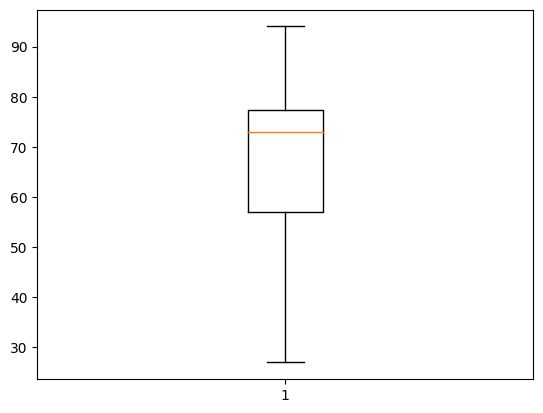

In [147]:
plt.boxplot(meta.Tuoi)

+ Note:
    + Vậy độ tuổi của người nổi tiếng thường tập trung vào khoảng 55 đến 80 tuổi là chủ yếu

> ### Mối quan hệ giữa số lượng câu nói với tuổi của tác giả

In [158]:
most_author.drop('age', axis=1, inplace=True)

In [159]:
most_author['age'] = most_author.apply(lambda row: int(ages[row.Author]), axis=1)

In [160]:
most_author.head(5)

,Author,Quantily,age
0,Albert Einstein,10,76
26,J.K. Rowling,9,57
37,Marilyn Monroe,7,36
38,Mark Twain,6,74
11,Dr. Seuss,6,87


In [161]:
most_author.age.corr(most_author.Quantily)

-0.1705322647453309

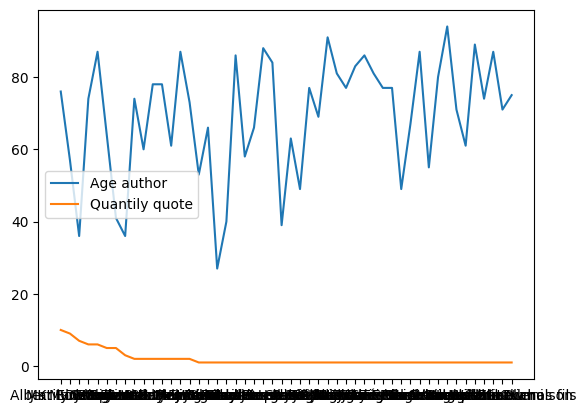

In [167]:
plt.plot(most_author.Author, most_author.age, label='Age author')
plt.plot(most_author.Author, most_author.Quantily, label='Quantily quote')
plt.legend()

+ Note:
    + Việc có nhiều câu nói không phụ thuộc nhiều vào độ tuổi khoảng từ 25 trở lên

# 3.2.3. Trích xuất đặc trưng- Feature Extraction (5 điểm):


In [168]:
# Để phục vụ cho việc phân tích và dự đoán thì các dữ liệu không phải dạng số chúng em sẽ mã hóa hoặc biến đổi về dạng int

> Split Namsinh

In [169]:
meta.head()

,Tacgia,Link,Namsinh,Quote,STT,Tuoi,quantity_quotes
0,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“The world as we have created it is a process ...,0,76,21
1,J.K. Rowling,http://quotes.toscrape.com//author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t...",1,57,16
2,Albert Einstein,http://quotes.toscrape.com//author/Albert-Eins...,1879-03-14,“There are only two ways to live your life. On...,2,76,26
3,Jane Austen,http://quotes.toscrape.com//author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ...",3,41,19
4,Marilyn Monroe,http://quotes.toscrape.com//author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and...",4,36,16


In [170]:
meta['Year'] = meta['Namsinh'].dt.year
meta['Month'] = meta['Namsinh'].dt.month
meta['Day'] = meta['Namsinh'].dt.day

In [171]:
meta.drop('Namsinh', axis=1, inplace=True)

> Mã hóa tên tác giả

In [176]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
meta['Tacgia'] = encoder.fit_transform(meta.Tacgia)

In [188]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vector = vectorizer.fit_transform(meta.Quote)
vectorizer.vocabulary_

{'the': 555,
 'world': 647,
 'as': 43,
 'we': 623,
 'have': 261,
 'created': 133,
 'it': 306,
 'is': 304,
 'process': 464,
 'of': 417,
 'our': 435,
 'thinking': 564,
 'cannot': 93,
 'be': 56,
 'changed': 105,
 'without': 642,
 'changing': 106,
 'choices': 113,
 'harry': 257,
 'that': 554,
 'show': 501,
 'what': 626,
 'truly': 587,
 'are': 39,
 'far': 203,
 'more': 390,
 'than': 553,
 'abilities': 2,
 'there': 558,
 'only': 425,
 'two': 594,
 'ways': 622,
 'to': 575,
 'live': 342,
 'your': 660,
 'life': 337,
 'one': 423,
 'though': 568,
 'nothing': 413,
 'miracle': 383,
 'other': 434,
 'everything': 188,
 'person': 445,
 'gentleman': 230,
 'or': 431,
 'lady': 324,
 'who': 633,
 'has': 258,
 'not': 412,
 'pleasure': 452,
 'in': 290,
 'good': 241,
 'novel': 415,
 'must': 397,
 'intolerably': 302,
 'stupid': 535,
 'imperfection': 287,
 'beauty': 58,
 'madness': 366,
 'genius': 229,
 'and': 27,
 'better': 71,
 'absolutely': 5,
 'ridiculous': 480,
 'boring': 80,
 'try': 590,
 'become': 60,
 

In [191]:
print(vector.toarray().shape)

(100, 663)


In [198]:
meta_encod = pd.concat([meta, pd.DataFrame(vector.toarray())], axis=1)
meta_encod.head(5)

,Tacgia,Link,Quote,STT,Tuoi,quantity_quotes,Year,Month,Day,0,...,653,654,655,656,657,658,659,660,661,662
0,0,http://quotes.toscrape.com//author/Albert-Eins...,“The world as we have created it is a process ...,0,76,21,1879,3,14,0,...,0,0,0,0,0,0,0,0,0,0
1,26,http://quotes.toscrape.com//author/J-K-Rowling,"“It is our choices, Harry, that show what we t...",1,57,16,1965,7,31,0,...,0,0,0,0,0,0,0,0,0,0
2,0,http://quotes.toscrape.com//author/Albert-Eins...,“There are only two ways to live your life. On...,2,76,26,1879,3,14,0,...,0,0,0,0,0,0,0,1,0,0
3,30,http://quotes.toscrape.com//author/Jane-Austen,"“The person, be it gentleman or lady, who has ...",3,41,19,1775,12,16,0,...,0,0,0,0,0,0,0,0,0,0
4,37,http://quotes.toscrape.com//author/Marilyn-Monroe,"“Imperfection is beauty, madness is genius and...",4,36,16,1926,6,1,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
meta_encod.drop(['Quote', 'Link', 'STT'], axis=1, inplace=True)

In [200]:
meta_encod

,Tacgia,Tuoi,quantity_quotes,Year,Month,Day,0,1,2,3,...,653,654,655,656,657,658,659,660,661,662
0,0,76,21,1879,3,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26,57,16,1965,7,31,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,76,26,1879,3,14,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,30,41,19,1775,12,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,36,16,1926,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,22,89,27,1926,4,28,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
96,36,88,27,1918,11,29,0,0,0,0,...,0,1,0,0,0,2,0,0,0,0
97,38,74,12,1835,11,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,11,87,8,1904,3,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> Hiển thị độ tương quan 

Text(0.5, 1.0, 'Correlation Heatmap')

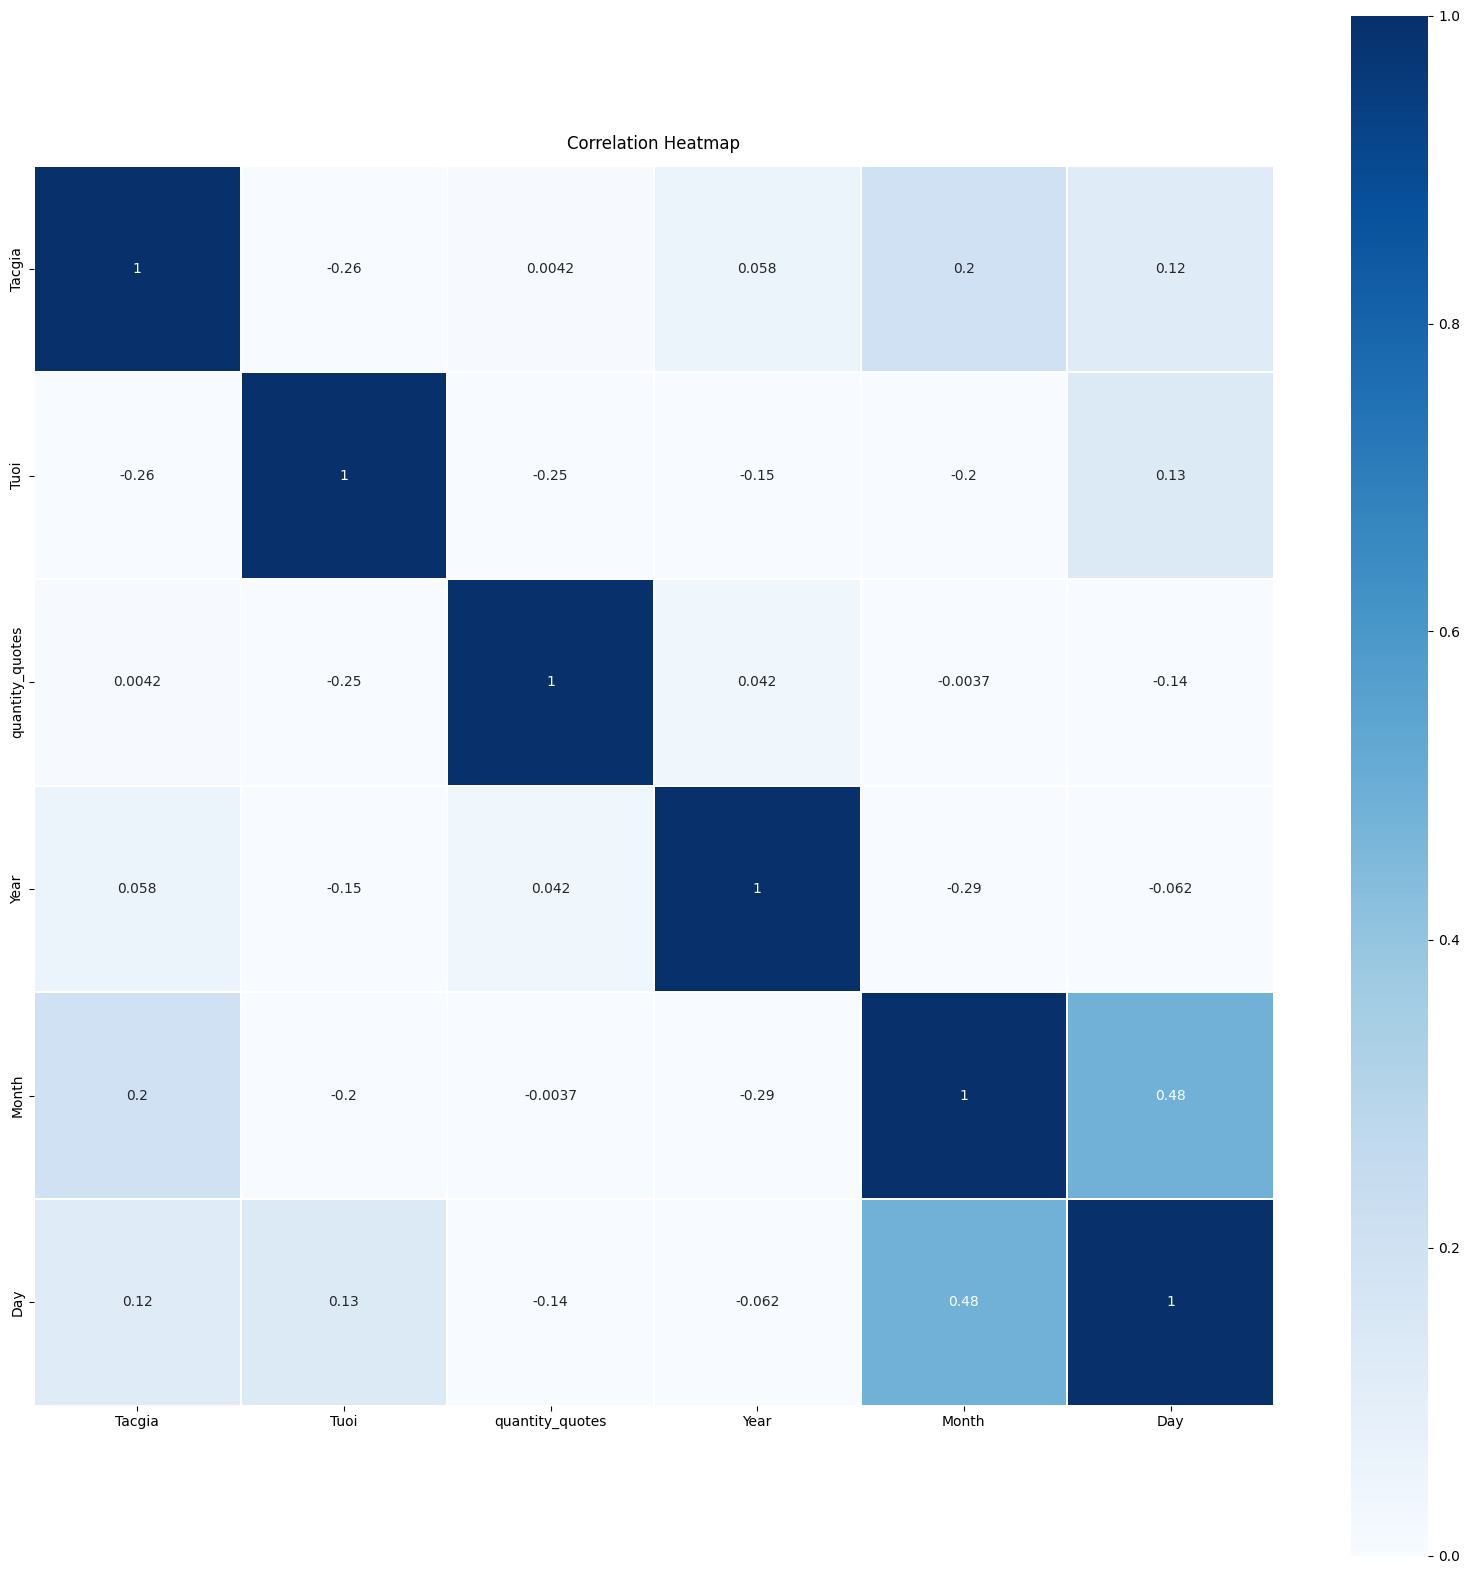

In [204]:
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(meta_encod[["Tacgia"	,"Tuoi",	"quantity_quotes",	"Year"	,"Month"	,"Day"]].corr(),linewidths=0.1,vmax=1.0,vmin=0, 
            square=True, cmap="Blues", linecolor='white', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

+ Note:
    + Sau khi mã hóa và tạo thêm khá nhiều cột mới, thì e sẽ lấy tất cả các feature trừ các feature  'Quote', 'Link', 'STT', 'Ngaysinh', 'quantity_quotes'
    + Lý do chọn các trường này vì có mức độ tương quan với biến target tác giả khá cao và một số trường bị loại bỏ là do đã chuyển đổi sang một định dạng mới

In [208]:
meta_encod.drop('quantity_quotes', axis=1, inplace=True)

> Chọn features và target

In [212]:
features = meta_encod.columns.drop('Tacgia')
target = 'Tacgia'

# 3.2.4. Suy luận (15 điểm): 


In [237]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [216]:

X_train, X_test, y_train, y_test = train_test_split(meta_encod[features], meta_encod[target], test_size = 0.2, random_state = 42)

In [238]:
class Mode:
    def __init__(self, model, name_model):
        self.model = model
        self.name_model = name_model
        self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test

    def process_model(self):
        self.model.fit(self.X_train, self.y_train)
        y_pred_en = self.model.predict(X_test)
        print(f'Model {self.name_model} accuracy score = {accuracy_score(y_test, y_pred_en)}')

In [239]:
Modes = [
    (DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0), 'Decision-Tree'),
    (RandomForestClassifier(n_estimators=100, random_state=0), 'Random Forest')
]

In [240]:
for mode in Modes:
    m =Mode(mode[0], mode[1])
    m.process_model()


Model Decision-Tree accuracy score = 0.55
Model Random Forest accuracy score = 0.65


c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. A

### - Hãy đề xuất cách tính độ tương đồng phong cách nói giữa các tác giả và tìm ra các tác giả có phong cách nói tương đồng nhau nhất? (5 điểm)

+ Đối với câu hỏi này thì để đánh giá được phong cách thì chính là đánh giá về mức độ trùng nhau giữa các câu chữ của 2 tác giả